# Salary Regression Model

### Import Libraries

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

### Load Data

In [45]:
# Load in the 'Salary_dataset' dataset
df = pd.read_csv("Salary_dataset.csv")

### Data Cleaning and Exploratory Data Analysis

In [46]:
# Check dataset
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [47]:
# Drop "Unnamed: 0" column
df.drop("Unnamed: 0", axis=1, inplace=True)

In [49]:
# Re-check Dataset
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [48]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [37]:
df.describe()   # Quantitative analysis of the dataframe

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


### Data Visualization on years of experience and Salary

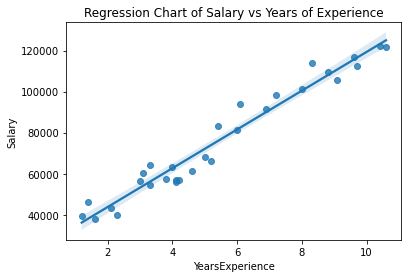

In [55]:
# Plot a regression plot of Years of experience against salary
sns.regplot(data=df, x="YearsExperience", y="Salary")
plt.title("Regression Chart of Salary vs Years of Experience")
plt.show()

#### Summary

The higher the years of experience, the higher the salary

### Data preparation

In [38]:
## save salary column as y
y = df["Salary"]

In [39]:
# Drop 'salary' and 'Unnamed: 0' columns in dataframe and save as x
X = df.drop("Salary", axis=1)

In [40]:
X.head(3)

,YearsExperience
0,1.2
1,1.4
2,1.6


In [41]:
y.head(3)

0    39344.0
1    46206.0
2    37732.0
Name: Salary, dtype: float64

### Data Splitting

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

In [115]:
X_train.head()

,YearsExperience
27,9.7
25,9.1
6,3.1
17,5.4
22,8.0


In [116]:
X_test.head()

,YearsExperience
9,3.8
26,9.6
28,10.4
13,4.2
5,3.0


## Model Building

### Linear Regression

In [50]:
lr = LinearRegression() #Create alias for LinearRegression

In [51]:
# Training the model
lr.fit(X_train, y_train)

LinearRegression()

In [57]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [59]:
y_lr_train_pred

array([116686.78246579, 111070.1126316 ,  54903.41428967,  76433.98198741,
       100772.88460224,  64264.53067999,  47414.52117741, 125111.78721708,
        37117.29314805,  38989.51642612,  82050.6518216 ,  68945.08887515,
        82986.76346063,  93283.99148998,  40861.73970418,  90475.65657289,
        63328.41904096,  74561.75870934,  72689.53543128, 103581.21951934,
        56775.63756773,  45542.29789934, 108261.7777145 ,  56775.63756773])

In [60]:
y_lr_test_pred

array([ 61456.19576289, 115750.67082676, 123239.56393901,  65200.64231902,
        53967.30265063,  64264.53067999])

### Evaluate Model Performance

In [70]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [78]:
print(
    "LR MSE (TRAIN) : ", lr_train_mse,
    "\nLR R2 (TRAIN) : ", lr_train_r2,
    "\nLR MSE (TEST) : ", lr_test_mse,
    "\nLR R2 (TEST) : ", lr_test_r2
)

LR MSE (TRAIN) :  33430977.96755591 
LR R2 (TRAIN) :  0.9514027940440705 
LR MSE (TEST) :  24477109.08965573 
LR R2 (TEST) :  0.9720725422361338


In [86]:
lr_results = pd.DataFrame(["Linear Regression", lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]

In [87]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,33430977.967556,0.951403,24477109.089656,0.972073


## Random Forest

### Training The Model

In [91]:
rf = RandomForestRegressor(max_depth=2, random_state=100)

In [92]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying model to make prediction

In [93]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### Evaluate Model prediction

In [94]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [96]:
rf_results = pd.DataFrame(["Random Forest", rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,18257584.679993,0.97346,41589826.211829,0.952548


## Model Comparison

In [99]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,33430977.967556,0.951403,24477109.089656,0.972073
1,Random Forest,18257584.679993,0.97346,41589826.211829,0.952548


## Data Visualization of prediction results

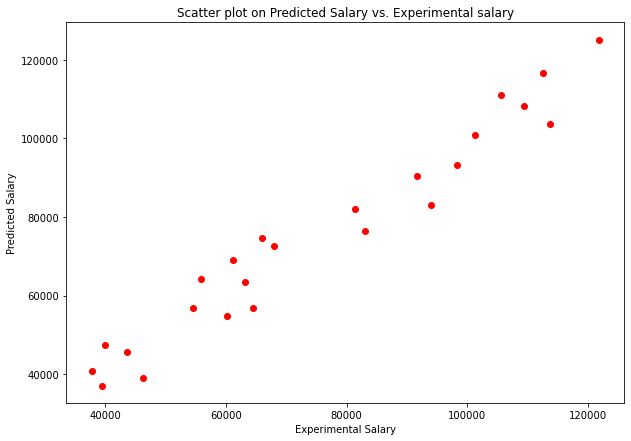

In [114]:
plt.figure(figsize = (10,7))

plt.scatter(x = y_train, y = y_lr_train_pred, c = "r")

plt.title("Scatter plot on Predicted Salary vs. Experimental salary")
plt.ylabel("Predicted Salary")
plt.xlabel("Experimental Salary")

plt.show()